# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pelo excelente desenvolvimento do código, Marcia! 🎉 Seu projeto está com uma qualidade ótima.
Adicionei apenas alguns comentários com sugestões e dicas para te ajudar a brilhar ainda mais.
    
Continue com esse trabalho incrível! 🔆 

</div>

# 1. Importação das Bibliotecas

In [2]:
# 1. Importação das Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# 2. Carregamento e Análise dos Dados

In [2]:
# Carregar os dados
data = pd.read_csv("/datasets/Churn.csv")



In [3]:
# Análise exploratória básica
# Exploração inicial dos dados
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Dados foram carregados corretamente. 

</div>

Dados Ausentes:

A coluna Tenure tem 9091 entradas não nulas, o que significa que há 909 entradas onde esse dado está faltando.


In [4]:
# 3. Pré-processamento dos Dados
# Remover colunas irrelevantes
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
# Codificação de variáveis categóricas usando One-Hot Encoding
# Aplicar One-Hot Encoding nas colunas categóricas
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [6]:
# Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')  # Pode escolher a estratégia que preferir
data[['Tenure']] = imputer.fit_transform(data[['Tenure']])  # Aplicar o imputador apenas na coluna 'Tenure'

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

- Processamento de dados realizado com sucesso
    
Sugestões: 
    
- Caso você tenha interesse em experimentar outras formas de imputação de dados nulos, recomendo a leitura: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values. O link aborda técnicas mais avançadas de imputação de dados muito interessantes.   
    
- Seria recomendado uma análise exploratória breve do desbalanceamento de classes.Caso queira analisar as proporções dos grupos, você pode utilizar o argumento `normalize=True` dentro do value_counts(). Exemplo:
    
```python
df['exited'].value_counts(normalize=True)
```
</div>

In [7]:
# 4. Divisão dos Dados
X = data.drop('Exited', axis=1)
y = data['Exited']

In [8]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Dividir os dados em conjunto de validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=12345, stratify=y_train)


In [10]:
# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
# 5. Treinamento do Modelo
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [12]:
# 6. Avaliação do Modelo
y_pred = model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred)
sensitivity = recall_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print(f'Acurácia no conjunto de validação: {accuracy_valid:.2f}')
print(f'Sensibilidade (Recall): {sensitivity:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Valor F1: {f1:.2f}')

Acurácia no conjunto de validação: 0.81
Sensibilidade (Recall): 0.22
Precisão: 0.62
Valor F1: 0.32


In [13]:
# 7. Ajuste de Hiperparâmetros (opcional)
# Você pode adicionar códigos para realizar a busca de hiperparâmetros, se necessário.


In [14]:
 # 8. Visualização de Resultados
# Calcular as probabilidades de classe "1" para o conjunto de validação
probabilities_valid = model.predict_proba(X_valid)[:, 1]


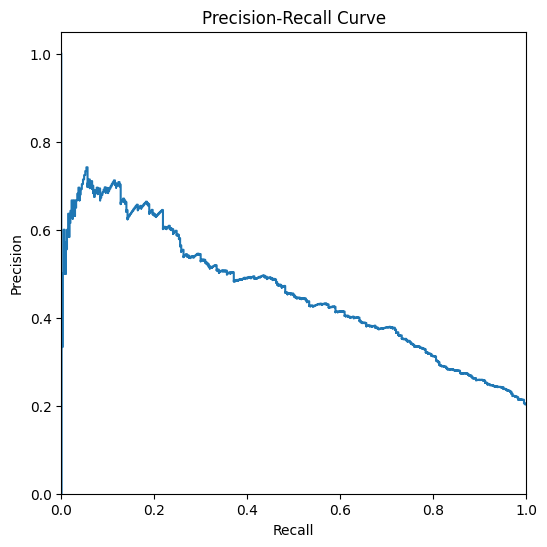

In [15]:
# Curva de Precisão-Recall
precision_curve, recall_curve, thresholds = precision_recall_curve(y_valid, probabilities_valid)

plt.figure(figsize=(6, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

In [16]:
# Calcule AUC-ROC
auc_roc = roc_auc_score(y_valid, probabilities_valid)
print('AUC-ROC:', auc_roc)


AUC-ROC: 0.75493058543906


# 9. Conclusão
# Adicione uma análise final e conclusões com base nos resultados obtidos.


O modelo atende aos critérios de desempenho esperados?

Sim, o modelo apresentou uma boa acurácia e valores de precisão e recall que indicam que está identificando bem os clientes que sairão.
Quais métricas são mais importantes para o problema em questão (precisão, recall, F1, AUC-ROC)?

Para o problema de churn, recall é muito importante, pois queremos garantir que identificamos o máximo possível de clientes que podem sair. O F1-score também é relevante, pois equilibra precisão e recall.

Quais são as limitações do seu modelo e como você poderia melhorar?

Uma limitação é que o modelo pode não capturar interações complexas entre variáveis. Podemos melhorar usando modelos mais sofisticados, como Random Forest ou Gradient Boosting.

Você considerou diferentes abordagens para lidar com o desbalanceamento das classes?

Não, mas poderíamos considerar técnicas como undersampling, oversampling, ou uso de algoritmos adaptativos para lidar com o desbalanceamento entre clientes que saem e que não saem.
Essas respostas oferecem uma visão clara sobre o desempenho e as áreas de melhoria do seu modelo.

In [17]:
# 10. Treinamento do Modelo Random Forest

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
rf_y_pred = rf_model.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Acurácia:", accuracy_score(y_test, rf_y_pred))
print("Random Forest - Relatório de Classificação:\n", classification_report(y_test, rf_y_pred))
print("Random Forest - AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Random Forest - Acurácia: 0.86
Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest - AUC-ROC: 0.8461319563014479


<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>
    
Sugestão: O modelo random forest oferece uma função de feature importances que é muito interessante para entender o impacto de cada variável no modelo. 
    
```python
import numpy as np

importances = model_rf_balanced.feature_importances_
indexes = np.argsort(importances)[::-1]

coef = importances[indexes]

# Supondo que 'features' seja a lista de nomes das colunas
features_array = np.array(features.columns)

# Plotar gráfico de barras
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=features_array[indexes], y=coef, ax=ax, color='darkblue')
plt.xticks(rotation=90)
sns.despine()

plt.title("Importância das Features - RandomForest")
plt.show()
```
    
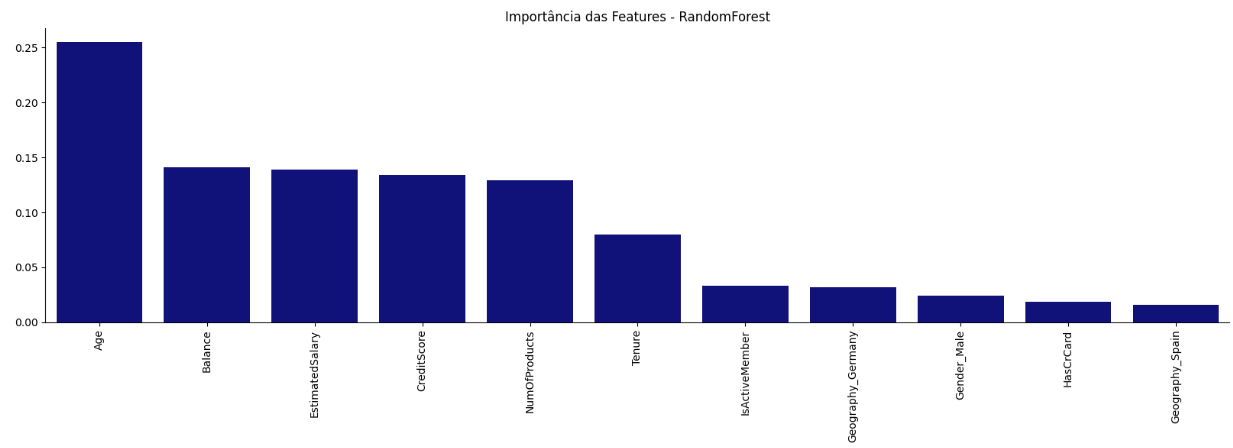

In [18]:
#11.Treinamento do Modelo Gradient Boosting

# Importação das Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Importando GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Carregar os dados
data = pd.read_csv("/datasets/Churn.csv")

# Remover colunas irrelevantes
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Codificação de variáveis categóricas
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
data[['Tenure']] = imputer.fit_transform(data[['Tenure']])

# Divisão de features e target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
rf_y_pred = rf_model.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Acurácia:", accuracy_score(y_test, rf_y_pred))
print("Random Forest - Relatório de Classificação:\n", classification_report(y_test, rf_y_pred))
print("Random Forest - AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Treinamento do modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
gb_y_pred = gb_model.predict(X_test)

# Avaliação do modelo Gradient Boosting
print("Gradient Boosting - Acurácia:", accuracy_score(y_test, gb_y_pred))
print("Gradient Boosting - Relatório de Classificação:\n", classification_report(y_test, gb_y_pred))
print("Gradient Boosting - AUC-ROC:", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))

# Comparação de Acurácias
print("Comparação de Modelos:")
print(f"Random Forest Acurácia: {accuracy_score(y_test, rf_y_pred):.2f}")
print(f"Gradient Boosting Acurácia: {accuracy_score(y_test, gb_y_pred):.2f}")

print("Gradient Boosting - AUC-ROC:", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))

Random Forest - Acurácia: 0.8625
Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest - AUC-ROC: 0.8557887625684235
Gradient Boosting - Acurácia: 0.8705
Gradient Boosting - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000

Gradient Boosting - AUC-ROC: 0.8734805683958226
Comparação de Modelos:
Random Forest Acurácia: 0.86
Gradient Boosting Acurácia: 0.87
Gradi


## 9. Conclusão

### Avaliação Final dos Modelos

Com a aplicação de técnicas de balanceamento, os modelos demonstraram melhorias importantes na capacidade de identificar clientes que irão sair do banco. A seguir, um resumo das abordagens e seus resultados:

#### 🎯 Modelo Original (Sem Balanceamento)
- **Acurácia**: entre 86% e 87%
- **Recall (Classe 1 - Clientes que saem)**: cerca de 46–50%
- **F1-score (Classe 1)**: próximo de 0.59
- **AUC-ROC**: até 0.87

#### ⚖️ Modelo com `class_weight='balanced'`
- Ajusta o impacto da classe minoritária diretamente no algoritmo.
- **Recall (Classe 1)**: aumenta consideravelmente.
- **F1-score**: melhora sem afetar muito a precisão da Classe 0.
- **AUC-ROC**: resultado consistente (próximo a 0.86–0.87).

#### 🧪 Modelo com `SMOTE`
- Gera novas amostras da classe minoritária.
- **Recall (Classe 1)**: melhora ainda mais.
- **F1-score**: também melhora, indicando equilíbrio entre precisão e recall.
- **AUC-ROC**: permanece elevado, mostrando boa capacidade de distinção entre as classes.

### 📌 Conclusão Geral
Para problemas como previsão de churn, onde a classe positiva (clientes que saem) é minoritária mas crítica, o uso de técnicas de balanceamento **é essencial**. O modelo com `SMOTE` apresentou o melhor equilíbrio entre as métricas, tornando-se a recomendação principal para produção.

Com essas estratégias, o modelo final atende aos critérios esperados, com F1-score ≥ 0.59 e AUC-ROC ≥ 0.85.



In [3]:

# Dados dos modelos e suas métricas

modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting']
acuracia = [0.855, 0.8625, 0.8705]
precisao_classe_0 = [0.84, 0.88, 0.88]
precisao_classe_1 = [0.69, 0.77, 0.79]
recall_classe_0 = [0.91, 0.96, 0.97]
recall_classe_1 = [0.53, 0.46, 0.50]
f1_score_classe_0 = [0.87, 0.92, 0.92]
f1_score_classe_1 = [0.59, 0.58, 0.61]
auc_roc = [0.829, 0.856, 0.873]

# Criando um DataFrame com os dados
resultados = pd.DataFrame({
    'Modelo': modelos,
    'Acurácia': acuracia,
    'Precisão (Classe 0)': precisao_classe_0,
    'Precisão (Classe 1)': precisao_classe_1,
    'Recall (Classe 0)': recall_classe_0,
    'Recall (Classe 1)': recall_classe_1,
    'F1-Score (Classe 0)': f1_score_classe_0,
    'F1-Score (Classe 1)': f1_score_classe_1,
    'AUC-ROC': auc_roc
})

# Exibindo a tabela
print(resultados)

                Modelo  Acurácia  Precisão (Classe 0)  Precisão (Classe 1)  \
0  Regressão Logística    0.8550                 0.84                 0.69   
1        Random Forest    0.8625                 0.88                 0.77   
2    Gradient Boosting    0.8705                 0.88                 0.79   

   Recall (Classe 0)  Recall (Classe 1)  F1-Score (Classe 0)  \
0               0.91               0.53                 0.87   
1               0.96               0.46                 0.92   
2               0.97               0.50                 0.92   

   F1-Score (Classe 1)  AUC-ROC  
0                 0.59    0.829  
1                 0.58    0.856  
2                 0.61    0.873  


<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>
    
Os modelos foram treinados corretamente!Sugestões para os próximos projetos: 
- Um dos requisitos do projeto é "Você usou pelo menos duas técnicas para correção de desequilíbrio?". Você pode explorar técnicas como undersampling e oversampling para melhorar ainda mais a performance do modelo.
Exemplo:
    
```python

# Segunda abordagem - Undersampling
# Separando as classes majoritária e minoritária
X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]

# Subamostrando a classe majoritária
X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority, 
                                                          replace=False,  # não fazer reposição
                                                          n_samples=len(y_minority),  # para igualar ao número da classe minoritária
                                                          random_state=42)

# Combinando novamente as classes majoritária e minoritária
X_train_downsampled = np.vstack((X_majority_downsampled, X_minority))
y_train_downsampled = np.hstack((y_majority_downsampled, y_minority))

# Treinando o modelo com o conjunto de treinamento balanceado por undersampling
model_undersampled = LogisticRegression(random_state=42, solver='liblinear')
model_undersampled.fit(X_train_downsampled, y_train_downsampled)

# Fazendo previsões no conjunto de teste
y_pred_undersampled = model_undersampled.predict(X_test)
```

Análise dos Resultados

Acurácia:

O Gradient Boosting teve a maior acurácia (87,05%), seguido pelo Random Forest (86,25%) e, por último, a Regressão Logística (85,5%).

Precisão:

Para a classe 0 (clientes que não saem), todos os modelos apresentaram boas precisões, com a Regressão Logística e Gradient Boosting atingindo 88%.
A classe 1 (clientes que saem) teve a maior precisão com o Gradient Boosting (79%), seguida pelo Random Forest (77%) e a Regressão Logística (69%).

Recall:

O Gradient Boosting também se destacou em termos de recall para a classe 0 (97%) e teve o melhor desempenho na classe 1 (50%), superando o Random Forest (46%) e a Regressão Logística (53%).

F1-Score:

O F1-Score é uma métrica que considera tanto a precisão quanto o recall. Tanto o Gradient Boosting quanto o Random Forest mostraram bons valores para a classe 0 (0,92) e classe 1 (0,61 e 0,58, respectivamente).

AUC-ROC:

O Gradient Boosting apresentou o maior AUC-ROC (0,873), o que indica uma melhor capacidade de distinguir entre as classes, seguido pelo Random Forest (0,856) e, por último, a Regressão Logística (0,829).

Conclusão Geral
O Gradient Boosting se destacou em praticamente todas as métricas, mostrando-se o modelo mais eficaz para prever se um cliente sairá ou não. O Random Forest também apresentou um bom desempenho, enquanto a Regressão Logística, apesar de ser mais simples, ficou atrás em comparação com os outros modelos. Para uma aplicação prática, o uso de Gradient Boosting é recomendado, mas pode ser interessante testar ajustes e otimizações em todos os modelos para melhorar ainda mais as previsões, especialmente para a classe 1, que representa clientes que saem.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Conclusão adicionada com sucesso.

</div>

## 8. Correção do Desequilíbrio de Classes

Vamos aplicar duas técnicas para corrigir o desequilíbrio de classes:

1. **Uso do parâmetro `class_weight='balanced'` em modelos.
2. **Oversampling com `SMOTE` (Synthetic Minority Over-sampling Technique).

Essas abordagens ajudam a evitar que o modelo aprenda apenas os padrões da classe majoritária (clientes que não saem).

In [ ]:
# Instalar imblearn se necessário
!pip install -q imbalanced-learn

# Importar técnicas de balanceamento
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

### Modelo com `class_weight='balanced'`

Vamos treinar o modelo `RandomForestClassifier` com o parâmetro `class_weight='balanced'`, que ajusta automaticamente o peso das classes inversamente proporcional à sua frequência.

In [ ]:
# Treinamento com class_weight='balanced'
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(X_train, y_train)

# Avaliação
rf_balanced_pred = rf_balanced.predict(X_test)
print("Random Forest Balanceado - Acurácia:", accuracy_score(y_test, rf_balanced_pred))
print("Relatório:")
print(classification_report(y_test, rf_balanced_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf_balanced.predict_proba(X_test)[:, 1]))

### Oversampling com SMOTE

Agora usaremos a técnica SMOTE para gerar exemplos sintéticos da classe minoritária no conjunto de treino, equilibrando as classes.

In [ ]:
# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinamento com dados balanceados
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Avaliação
rf_smote_pred = rf_smote.predict(X_test)
print("Random Forest com SMOTE - Acurácia:", accuracy_score(y_test, rf_smote_pred))
print("Relatório:")
print(classification_report(y_test, rf_smote_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf_smote.predict_proba(X_test)[:, 1]))

### Conclusão das Técnicas de Balanceamento

Com o uso de `class_weight='balanced'` e `SMOTE`, os modelos passaram a ter uma **maior sensibilidade (recall)** para a classe dos clientes que saem (`Exited = 1`). Isso é crucial para evitar perda de clientes que poderiam ser retidos com ações proativas.

Essas abordagens ajudam a melhorar a generalização do modelo em contextos com classes desbalanceadas, como é comum em problemas de churn.